## **FASE 4: AB TESTING**

- **Librerías**

In [64]:
# importar librerías

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Libreria Regex para buscar patrones
# -----------------------------------------------------------------------
import re

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

# Ajusta el ancho de la consola para evitar truncamientos
# -----------------------------------------------------------------------
pd.set_option("display.width", 1000) 

# ------------------------------------------------------------------------------
#import scipy.stats as stats
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest
from scipy.stats import levene
from scipy.stats import chi2_contingency, ttest_ind


# Importar otras librerías para manipulación y análisis de datos
# -----------------------------------------------------------------------
import csv

In [71]:
df_HR= pd.read_csv("Dataset_HR_final.csv")
df_HR.head()

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_count,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,year_birth,salary,remote_work
0,51,No,Unknown,684.0,Research & Development,6,3,Other,1,162.0,1,Male,51.0,3,5,Research Director,3,Unknown,1628.08,6462,7,No,13,3,3,40,0,11.25,5,3.00,20,15,15,1972,19537.0,Yes
1,52,No,Unknown,699.0,Research & Development,1,4,Life Sciences,1,259.0,3,Male,65.0,2,5,Manager,3,Unknown,1666.58,5678,0,No,14,3,1,40,1,34.00,5,3.00,33,11,9,1971,19999.0,Yes
2,42,No,travel rarely,532.0,Research & Development,4,2,Technical Degree,1,319.0,3,Male,58.0,3,5,Manager,4,Married,1602.67,4933,1,No,11,3,4,40,0,22.00,3,2.77,22,11,15,1981,19232.0,Yes
3,47,No,travel rarely,359.0,Research & Development,2,4,Medical,1,1462.0,1,Female,82.0,3,4,Research Director,3,Married,1430.75,26703,3,No,19,3,2,40,2,11.25,2,2.77,20,5,6,1976,17169.0,No
4,48,No,Unknown,117.0,Research & Development,22,3,Medical,1,1900.0,4,Female,58.0,3,4,Manager,4,Unknown,1431.17,2437,3,No,11,3,2,40,1,11.25,3,3.00,22,4,7,1975,17174.0,Yes


Partiremos de la siguiente hipótesis:

H0= empleados con niveles de satisfacción más bajos no tienen una mayor probabilidad de dejar la empresa.

H1= empleados con niveles de satisfacción más bajos tienen una mayor probabilidad de dejar la empresa.




Por lo tanto, los pasos que deberás seguir en esta fase son:

1. Divide a los empleados en los grupos A y B según los criterios establecidos.

2. Calcula la tasa de rotación (porcentaje de empleados que dejaron la empresa) en cada grupo.

3. Realiza un análisis estadístico para determinar si hay una diferencia significativa en la tasa de rotación entre los grupos A y B.

4. Analiza los resultados.

5. Calcular la magnitud de esta relación utilizando estadísticas como la diferencia de medias por ejemplo.

In [72]:
# Para trabajar con estadística vamos a cambiar los valores de attrition
dicc_att={"Yes":1, "No":0}

df_HR["attrition"] = df_HR["attrition"].replace(dicc_att)

/var/folders/fz/6pfhl_yj00jd3p96rvwr5zjh0000gn/T/ipykernel_2923/542448106.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_HR["attrition"] = df_HR["attrition"].replace(dicc_att)


In [74]:
# Grupo A (Control): Empleados con un nivel de satisfacción en el trabajo igual o superior a 3 en una escala de 1 a 5.
filtro_grupo_a= df_HR["job_satisfaction"]>= 3
grupo_a = df_HR[filtro_grupo_a]
grupo_a["Tipo_grupo"]= "Control"
grupo_a.head()


/var/folders/fz/6pfhl_yj00jd3p96rvwr5zjh0000gn/T/ipykernel_2923/2617486071.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grupo_a["Tipo_grupo"]= "Control"


,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_count,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,year_birth,salary,remote_work,Tipo_grupo
0,51,0,Unknown,684.0,Research & Development,6,3,Other,1,162.0,1,Male,51.0,3,5,Research Director,3,Unknown,1628.08,6462,7,No,13,3,3,40,0,11.25,5,3.00,20,15,15,1972,19537.0,Yes,Control
1,52,0,Unknown,699.0,Research & Development,1,4,Life Sciences,1,259.0,3,Male,65.0,2,5,Manager,3,Unknown,1666.58,5678,0,No,14,3,1,40,1,34.00,5,3.00,33,11,9,1971,19999.0,Yes,Control
2,42,0,travel rarely,532.0,Research & Development,4,2,Technical Degree,1,319.0,3,Male,58.0,3,5,Manager,4,Married,1602.67,4933,1,No,11,3,4,40,0,22.00,3,2.77,22,11,15,1981,19232.0,Yes,Control
3,47,0,travel rarely,359.0,Research & Development,2,4,Medical,1,1462.0,1,Female,82.0,3,4,Research Director,3,Married,1430.75,26703,3,No,19,3,2,40,2,11.25,2,2.77,20,5,6,1976,17169.0,No,Control
4,48,0,Unknown,117.0,Research & Development,22,3,Medical,1,1900.0,4,Female,58.0,3,4,Manager,4,Unknown,1431.17,2437,3,No,11,3,2,40,1,11.25,3,3.00,22,4,7,1975,17174.0,Yes,Control


In [76]:
# Grupo B (Variante): Empleados con un nivel de satisfacción en el trabajo inferior a 3 en la misma escala.
filtro_grupo_b= df_HR["job_satisfaction"]< 3
grupo_b = df_HR[filtro_grupo_b]
grupo_b["Tipo_grupo"]= "Testing"
grupo_b.head()

/var/folders/fz/6pfhl_yj00jd3p96rvwr5zjh0000gn/T/ipykernel_2923/2870320638.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grupo_b["Tipo_grupo"]= "Testing"


,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_count,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,year_birth,salary,remote_work,Tipo_grupo
5,59,0,Unknown,1435.0,Sales,25,3,Life Sciences,1,81.0,1,Female,99.0,3,3,Sales Executive,1,Unknown,567.28,2354,7,No,11,3,4,40,0,28.0,3,2.0,21,7,9,1964,6807.38,Yes,Testing
11,58,1,travel rarely,286.0,Research & Development,2,4,Other,1,825.0,4,Male,31.0,3,5,Research Director,2,Single,1603.83,25761,7,Yes,12,3,4,40,0,40.0,2,3.0,31,13,8,1965,19246.00,No,Testing
15,36,0,Unknown,429.0,Research & Development,2,4,Life Sciences,1,1294.0,3,Female,53.0,3,2,Manufacturing Director,2,Single,600.44,2323,9,Yes,11,3,4,40,0,18.0,2,3.0,16,5,12,1987,7205.33,No,Testing
20,35,0,Unknown,776.0,Sales,1,4,Marketing,1,100.0,3,Male,32.0,2,2,Sales Executive,1,Single,567.28,23016,0,No,14,3,2,40,0,16.0,2,3.0,15,2,8,1988,6807.38,No,Testing
21,46,0,travel rarely,526.0,Sales,1,2,Other,1,244.0,2,Female,92.0,3,3,Sales Executive,1,Divorced,567.28,2137,1,No,25,4,3,40,3,24.0,2,3.0,24,15,7,1977,6807.38,Yes,Testing


In [79]:
#Unimos DF

df_testing= pd.concat([grupo_a, grupo_b], ignore_index=True)

**Calculo de la tasa de rotación para cada grupo**
- Tasa de rotación(TR)= grupo/total grupo

In [44]:
df_grupo_a= grupo_a.groupby('attrition')["employee_count"].count().reset_index()

df_grupo_a["TR"]= (df_grupo_a["employee_count"]/df_grupo_a["employee_count"].sum()).round(2)
df_grupo_a

,attrition,employee_count,TR
0,0,571,0.86
1,1,94,0.14


In [45]:
df_grupo_b= grupo_b.groupby('attrition')["employee_count"].count().reset_index()
df_grupo_b["TR"]= (df_grupo_b["employee_count"]/df_grupo_b["employee_count"].sum()).round(2)
df_grupo_b

,attrition,employee_count,TR
0,0,332,0.8
1,1,83,0.2


**Pruebas estadísticas**

*1. Normalidad*

Al tener un conjunto de datos mayor a `50`

### Gráfico de la distribución de los datos

Text(0, 0.5, 'Frecuencia')

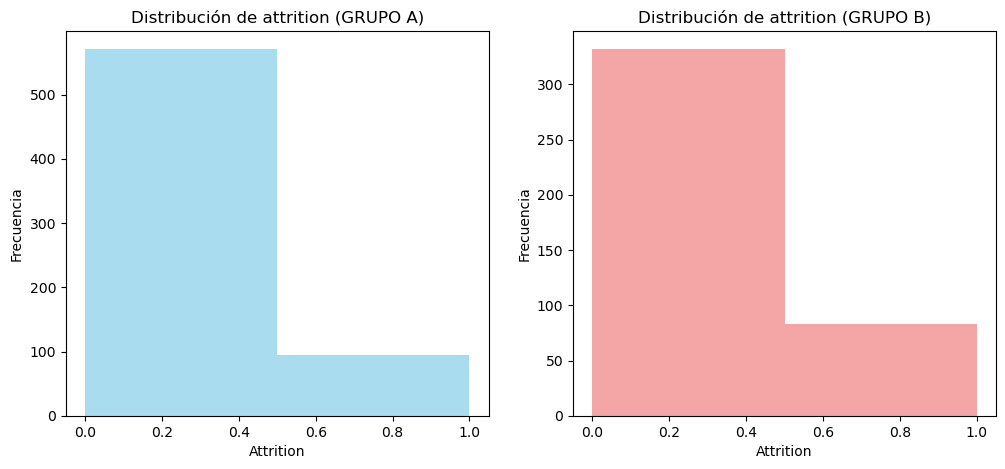

In [52]:
# Crear subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Histograma para productos "Producto local"
axes[0].hist(grupo_a['attrition'], bins=2, color='skyblue', alpha=0.7)
axes[0].set_title('Distribución de attrition (GRUPO A)')
axes[0].set_xlabel('Attrition')
axes[0].set_ylabel('Frecuencia')
# Histograma para productos "Buena calidad del producto"
axes[1].hist(grupo_b['attrition'], bins=2, color='lightcoral',alpha=0.7)
axes[1].set_title('Distribución de attrition (GRUPO B)')
axes[1].set_xlabel('Attrition')
axes[1].set_ylabel('Frecuencia')


In [47]:
# Datos de los dos grupos

# Realizar la prueba KS
statistica_ks, p_valor = stats.ks_2samp(grupo_a['attrition'],grupo_b['attrition'])

# Resultados
print("Estadística KS:", statistica_ks)
print("P-Valor:", p_valor)

if p_valor < 0.05:
    print("Las distribuciones son diferentes.")
else:
    print("Las distribuciones son similares.")

Estadística KS: 0.058646616541353384
P-Valor: 0.32695036562661495
Las distribuciones son similares.


En este caso el p-valor es 0.32 > 0.05, por lo que  no se rechaza la hipótesis nula (H0). Esto sugiere que los datos son consistentes con la distribución teórica o que las dos muestras provienen de la misma población.

*2.Homogeneidad de varianza*

Prueba de Levene, ya que tenemos dos grupos similares en terminos de normanilidad

In [53]:
stat, p_val = levene(grupo_a['attrition'],grupo_b['attrition'])
print("P-valor de Levene:", p_val)



P-valor de Levene: 0.011296447975534604


El valor p de esta prueba es menor que 0.05, por lo que las varianzas no son homogéneas. Es decir tienen distribuciones de datos distintas

In [50]:
df_grupo_b.describe()

,employee_count,TR
count,2.000000,2.000000
mean,207.500000,0.500000
std,176.069589,0.424264
min,83.000000,0.200000
25%,145.250000,0.350000
50%,207.500000,0.500000
75%,269.750000,0.650000
max,332.000000,0.800000


In [51]:
df_grupo_a.describe()

,employee_count,TR
count,2.000000,2.000000
mean,332.500000,0.500000
std,337.289935,0.509117
min,94.000000,0.140000
25%,213.250000,0.320000
50%,332.500000,0.500000
75%,451.750000,0.680000
max,571.000000,0.860000


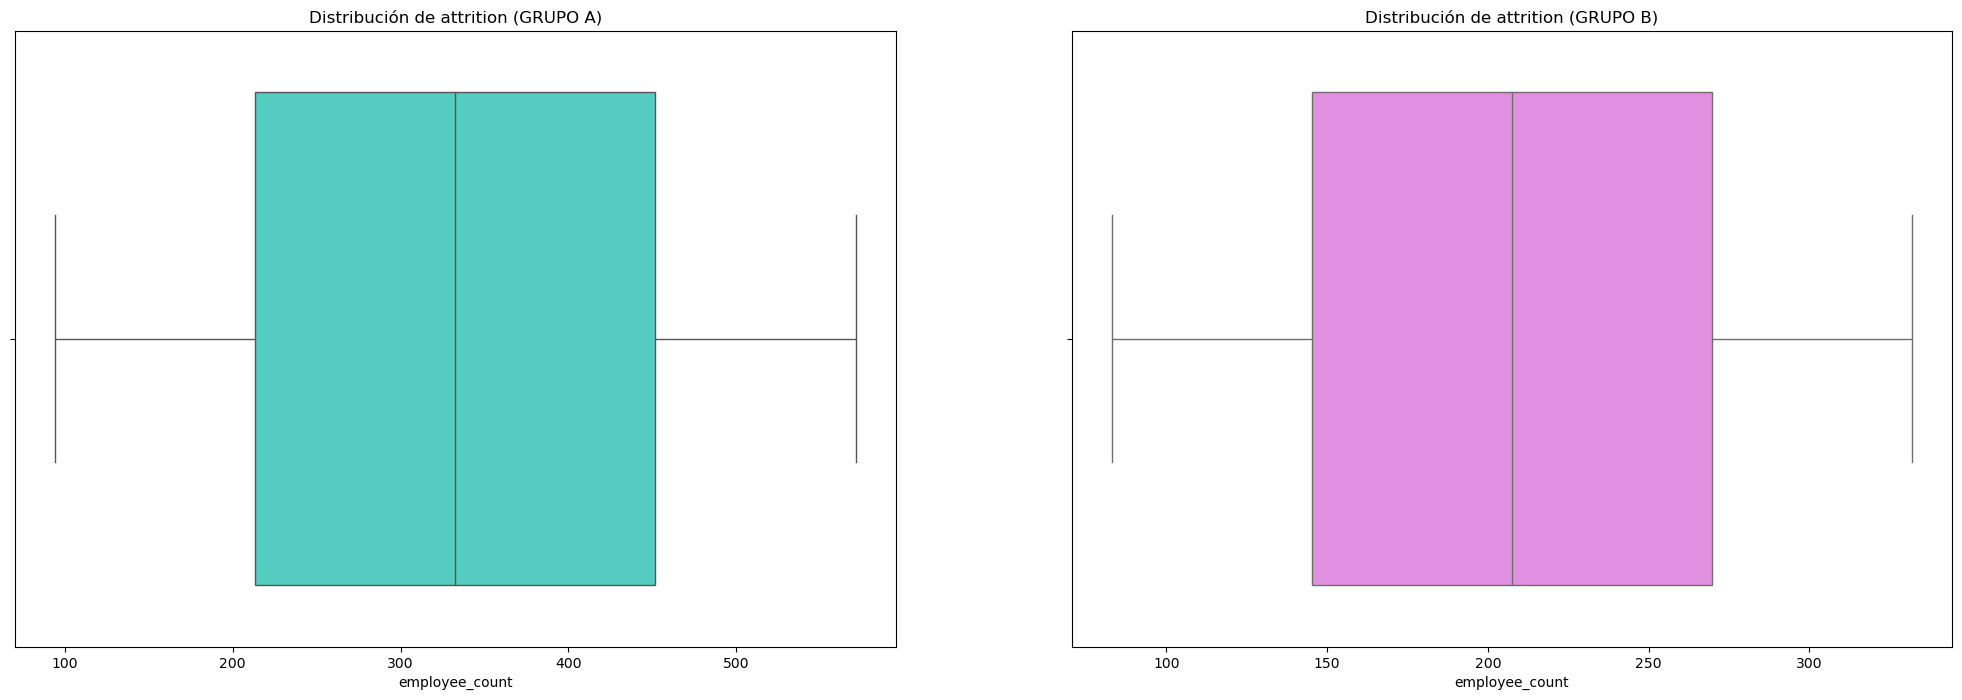

In [60]:
# Crear el subplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 8))  # Aumenta el tamaño de la figura

# Primer boxplot
sns.boxplot(x="employee_count",
            data=df_grupo_a,
            width=0.8,
            color="turquoise",
            ax=axes[0])

# Segundo boxplot
sns.boxplot(x="employee_count",
            data=df_grupo_b,
            width=0.8,
            color="violet",
            ax=axes[1])

axes[0].set_title('Distribución de attrition (GRUPO A)')
axes[1].set_title('Distribución de attrition (GRUPO B)');

# Ajustar límites de los ejes para ver los cuartiles mejo

*3.Independiencia*

In [81]:
# Crear una tabla de contingencia para 'Compraron' y 'No Compraron' agrupado por 'Grupo'
tabla_contingencia = df_testing.groupby('Tipo_grupo')[['attrition']].count()

# Mostrar la tabla de contingencia
print("\nTabla de Contingencia:")
print(tabla_contingencia)

# Realizar la prueba de Chi Cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_contingencia) # la ponderación es global mas allá del análisis por columna.

# Mostrar resultados
print("\nResultados de la prueba de Chi Cuadrado:")
print(f"Chi cuadrado: {chi2}")
print(f"Valor p: {p}")
print(f"Grados de libertad: {dof}")
print("\nTabla esperada:")
print(expected)

# Conclusión
if p > 0.05:
    print("\nConclusión: No hay relación entre la hipotesis 0 y la hipotesis 1 (son independientes).")
else:
    print("\nConclusión:Hay relación entre la hipotesis 0 y la hipotesis 1 .")



Tabla de Contingencia:
            attrition
Tipo_grupo           
Control           665
Testing           415

Resultados de la prueba de Chi Cuadrado:
Chi cuadrado: 0.0
Valor p: 1.0
Grados de libertad: 0

Tabla esperada:
[[665.]
 [415.]]

Conclusión: No hay relación entre la hipotesis 0 y la hipotesis 1 (son independientes).


Prueba Z

In [94]:
# Datos de las alturas
media_GrupoA = grupo_a['attrition'].mean()  # Media Grupo A
media_GrupoB = grupo_a['attrition'].mean()  # Media Grupo B
sigma_a= grupo_a['attrition'].std()  # Desviación estándar conocida
sigma_b= grupo_b['attrition'].std()
n_a = 665     # Tamaño de la muestra
n_b = 415
# Calcular el estadístico Z
z_statistic = (media_GrupoA  - media_GrupoB) / np.sqrt((sigma_a**2 / n_b) + (sigma_b**2 / n_b))

# Calcular el valor p
p_value = 2 * (1 - stats.norm.cdf(abs(z_statistic)))  # Prueba de dos colas

# Imprimir resultados
print("Estadístico Z:", z_statistic)
print("Valor p:", p_value)

# Interpretación de resultados
if p_value < 0.05:
    print("Hay diferencias significativas; las alturas son diferentes.")
else:
    print("No hay diferencias significativas; no podemos afirmar que hay mayor rotación para aquellos con mayor insatisfacción en la empresa")

Estadístico Z: 0.0
Valor p: 1.0
No hay diferencias significativas; no podemos afirmar que hay mayor rotación para aquellos con mayor insatisfacción en la empresa


CORRELACIONES

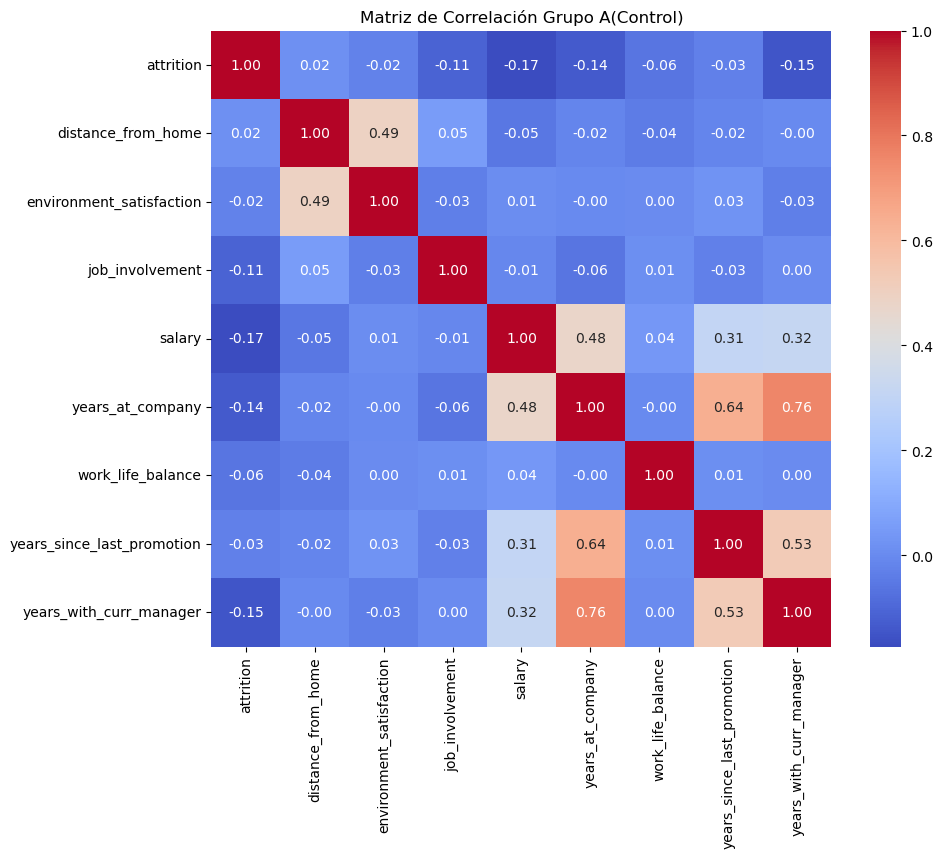

In [92]:
# FILTRAR COLUMNAS DE INTERÉS (Faltan varias)
columnas_interes=['attrition','distance_from_home','environment_satisfaction','job_involvement',"salary","years_at_company",'work_life_balance','years_since_last_promotion',"years_with_curr_manager"]
correlacion_matrix = grupo_a[columnas_interes].corr()

# Visualizar la matriz de correlación con tamaño ajustado
plt.figure(figsize=(10, 8))  # Ajustar el tamaño de la figura
sns.heatmap(correlacion_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación Grupo A(Control)")
plt.show()


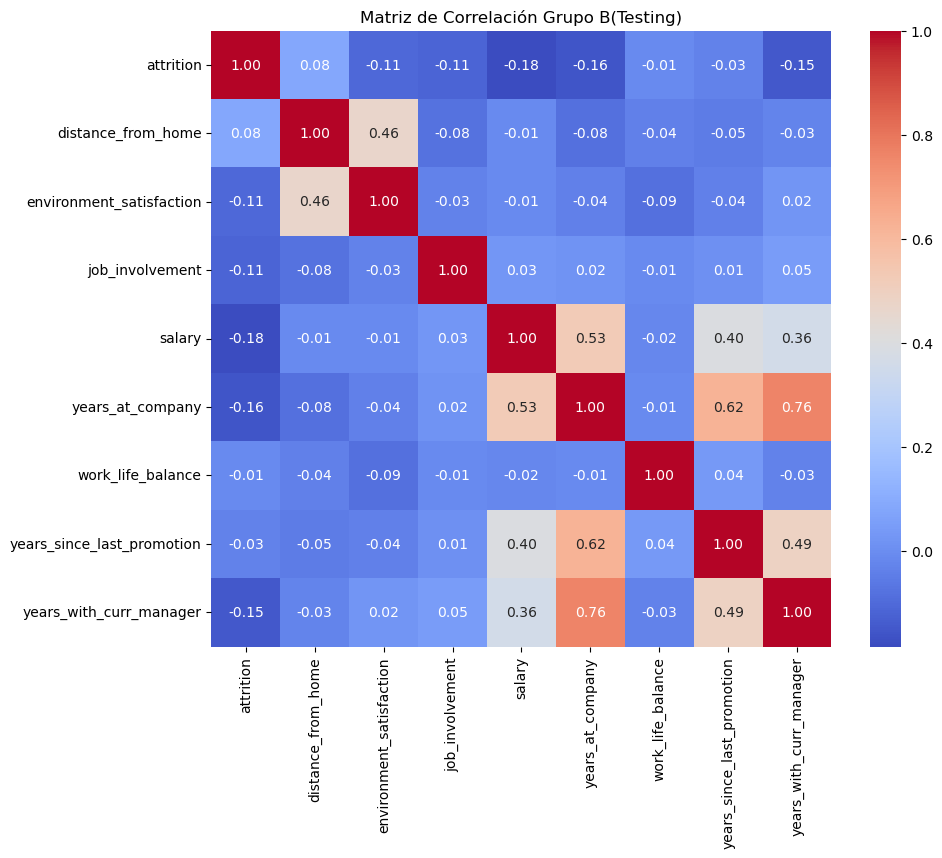

In [93]:
# FILTRAR COLUMNAS DE INTERÉS
columnas_interes=['attrition','distance_from_home','environment_satisfaction','job_involvement',"salary","years_at_company",'work_life_balance','years_since_last_promotion',"years_with_curr_manager"]
correlacion_matrix = grupo_b[columnas_interes].corr()

# Visualizar la matriz de correlación con tamaño ajustado
plt.figure(figsize=(10, 8))  # Ajustar el tamaño de la figura
sns.heatmap(correlacion_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación Grupo B(Testing)")
plt.show()
